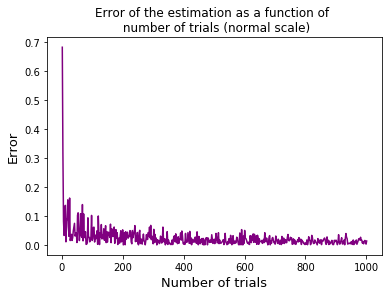

In [125]:
#importing libraries
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy import linalg as LA

#QUESTION 1

#defining a function that performs the buffon experiment
def buffon_experiment(n_trials):
    #picking arbitrary distance between parallel lines and length of the needle
    d = 4
    L = 2
    #starting a count of how many times a needle touches a line
    count = 0
    for i in range(n_trials):
        #picking a random distance between center of a needle and a line
        X = random.uniform(0,2)
        #picking a random angle
        theta = random.uniform(0,90)
        #checking if it satisfies the question provided by the prompt
        if X <= (L/2)*math.sin(math.radians(theta)):
            #if yes, we update the count
            count +=1
    #returning the percentage of times needle touches a line which is ur approximation of 1/pi        
    return count/n_trials

#plotting the error against the number of trials
n = np.linspace(1,1001,500)
errors = np.zeros(len(n))
for i in range(len(n)):
    errors[i] = abs(1/np.pi - buffon_experiment(int(n[i])))

plt.plot(n, errors, color = 'purple')
plt.title('Error of the estimation as a function of \n number of trials (normal scale)')
plt.xlabel('Number of trials', size=13)
plt.ylabel('Error', size=13)
plt.show()

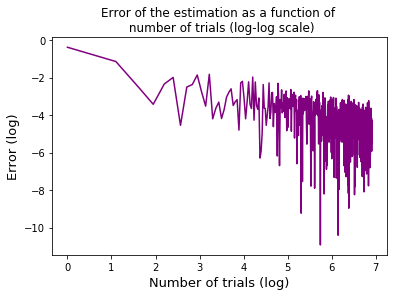

In [126]:
#log transforming the data
log_n = np.log(n)
log_errors = np.log(errors)


plt.plot(log_n, log_errors, color = 'purple')
plt.title('Error of the estimation as a function of \n number of trials (log-log scale)')
plt.xlabel('Number of trials (log)', size=13)
plt.ylabel('Error (log)', size=13)
plt.show()

The log-error decreases approximately linearly with the log of the number of trials because if we look at the original graph, we can see that it looks like exponential distribution. Taking a natural logarithm of an exponential function makes it linear, hence, the error decreases linearly.

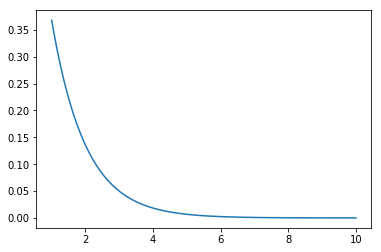

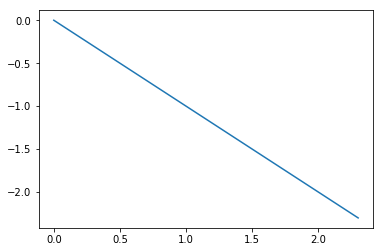

In [127]:
#showing how taking ln of an exponential funciton makes it linear
data = np.linspace(1,10,100)
def f(x):
    return 1/np.exp(x)

plt.plot(data, f(data))
plt.show()

data_ = np.log(data)
def f1(x):
    return np.log(1/np.exp(x))

plt.plot(data_, f1(data_))
plt.show()

In [128]:
#QUESTION 2

#10000 trials with 200 superexperiments
errors_1 = []
for i in range(10000):
    errors_1.append(abs(1/np.pi - buffon_experiment(200)))

In [129]:
#1000 trials with 2000 superexperiments
errors_2 = []
for i in range(1000):
    errors_2.append(abs(1/np.pi - buffon_experiment(2000)))

In [130]:
#1000 trials with 20000 superexperiments
errors_3 = [] 
for i in range(100):
    errors_3.append(abs(1/np.pi - buffon_experiment(20000)))

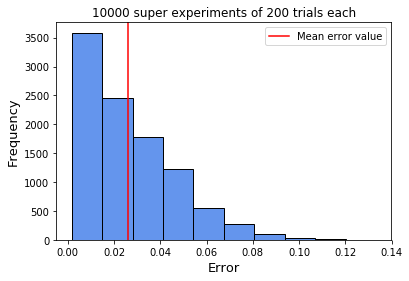

The mean error is: 0.026


In [131]:
plt.hist(errors_1, edgecolor='black', color='cornflowerblue')
plt.title('10000 super experiments of 200 trials each')
plt.xlabel('Error', size=13)
plt.ylabel('Frequency', size=13)
plt.axvline(x=np.mean(errors_1), color='red', label = 'Mean error value')
plt.legend()
plt.show()
print('The mean error is:', round(np.mean(errors_1), 3))

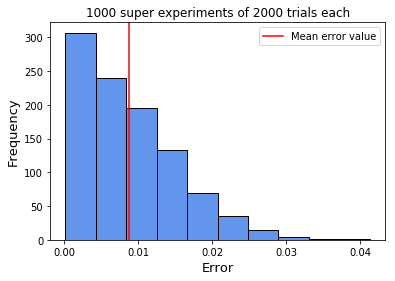

The mean error is: 0.009


In [132]:
plt.hist(errors_2, edgecolor='black', color='cornflowerblue')
plt.title('1000 super experiments of 2000 trials each')
plt.xlabel('Error', size=13)
plt.ylabel('Frequency', size=13)
plt.axvline(x=np.mean(errors_2), color='red', label = 'Mean error value')
plt.legend()
plt.show()
print('The mean error is:', round(np.mean(errors_2), 3))

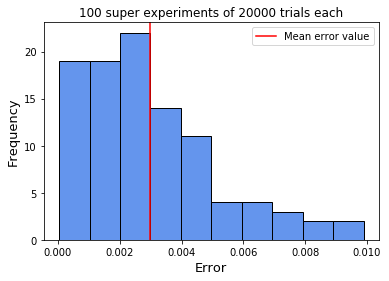

The mean error is: 0.003


In [133]:
plt.hist(errors_3, edgecolor='black', color='cornflowerblue')
plt.title('100 super experiments of 20000 trials each')
plt.xlabel('Error', size=13)
plt.ylabel('Frequency', size=13)
plt.axvline(x=np.mean(errors_3), color='red', label = 'Mean error value')
plt.legend()
plt.show()
print('The mean error is:', round(np.mean(errors_3), 3))

As we can see, we get the smallest mean error in the last case - when we have 100 super experiments of 20000 trials each. This is because the more times we throw a needle within each trial, the more accurate our approximation becomes. Hence, it is better to have a smaller number of large trials (because each individual trial will produce better approximation) rather than a lot of small trials (because we will have a lot of poor approximations).

In [134]:
from scipy.stats import beta
k = [1,3,5]
n=9

#creating a list of lists where we will store kth smallest values
smallest_values = [[],[],[]]

#for each value of k
for i in range(len(k)):
    #we run the process 1000 times
    for x in range(1000):
        #creating a uniformly distributed random sample
        sample = np.random.uniform(low=0,high=1,size=n)
        #soritng the sample and adding kth smallest values
        smallest_values[i].append(sorted(sample)[k[i]-1])

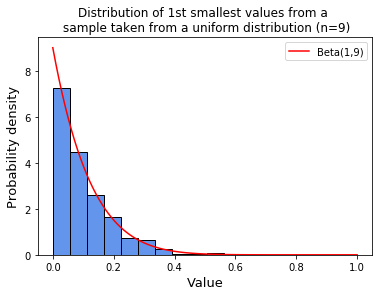

In [135]:
x = np.linspace(0,1,100)
plt.plot(x, beta.pdf(x, k[0], n+1-k[0]), color='red', label='Beta(1,9)')
plt.hist(smallest_values[0], density=True, edgecolor='black', color='cornflowerblue')
plt.title('Distribution of 1st smallest values from a \n sample taken from a uniform distribution (n=9)')
plt.xlabel('Value', size=13)
plt.ylabel('Probability density', size=13)
plt.legend()
plt.show()

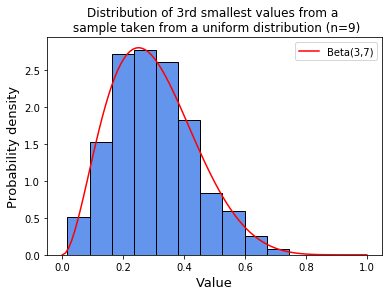

In [136]:
plt.plot(x, beta.pdf(x, k[1], n+1-k[1]), color='red', label='Beta(3,7)')
plt.hist(smallest_values[1], density=True, edgecolor='black', color='cornflowerblue')
plt.title('Distribution of 3rd smallest values from a \n sample taken from a uniform distribution (n=9)')
plt.xlabel('Value', size=13)
plt.ylabel('Probability density', size=13)
plt.legend()
plt.show()

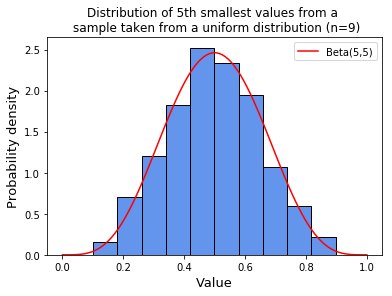

In [137]:
plt.plot(x, beta.pdf(x, k[2], n+1-k[2]), color='red', label='Beta(5,5)')
plt.hist(smallest_values[2], density=True, edgecolor='black', color='cornflowerblue')
plt.title('Distribution of 5th smallest values from a \n sample taken from a uniform distribution (n=9)')
plt.xlabel('Value', size=13)
plt.ylabel('Probability density', size=13)
plt.legend()
plt.show()

As we can see, the pdfs and the histrograms match very well.

In [138]:
#calculating the values of c0, c2 and c3 so the rows added up to 1
c0=1 - 1/2 * math.exp(-3)
c2=1 - 1/2 * math.exp(-1) - 1/2
c3=1 - 1/2 * math.exp(-1)

#creating a matrix
matrix_ = np.array([[c0, (1/2) * math.exp(-3), 0, 0],
          [1/2, 0, 1/2, 0],
          [0, (1/2) * math.exp(-1), c2, 1/2],
          [0, 0, (1/2) * math.exp(-1), c3]])

matrix = np.transpose(matrix_)
#getting the eigenvalues and eigenvectors
print(LA.eig(matrix)[0])
print(LA.eig(matrix)[1])
#now we need values from the 3rd column - we can normalize them to get the invariant distribution
vector = np.array([LA.eig(matrix)[1][0][2], LA.eig(matrix)[1][1][2], LA.eig(matrix)[1][2][2], LA.eig(matrix)[1][3][2]])
print("The invariant distribution is:", vector/np.sum(vector))




[-0.21737269  0.35822669  1.          0.96637303]
[[-0.25340962 -0.24509053 -0.9300295  -0.78505495]
 [ 0.60437139  0.30238279 -0.04630344  0.01371246]
 [-0.67992697  0.62206659 -0.12586581  0.17828746]
 [ 0.3289652  -0.67935884 -0.34213873  0.59305503]]
The invariant distribution is: [0.64391426 0.0320586  0.08714432 0.23688282]


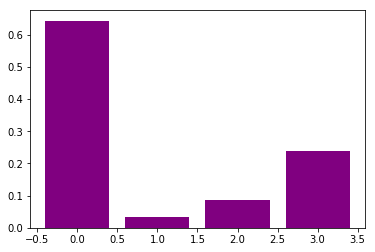

The invariant distribution obtained from a simulation with 50000 iterations is: [0.64306, 0.03206, 0.0866, 0.23828]


In [139]:
#simultating a markov chain walk
count0 = count1 = count2 = count3 = 0
#picking a random starting place
a = random.randint(0,3)
#choosing the number of iterations
n = 50000

#This for loop iterates 5000 times and starting with a random place
#Every time it chooses a random number from a uniform probability distribution.
#Further, depending on the number, we add 1 to a corresponding row
#and move to it and then sample a random number which is compared to probabilties of the new row

for i in range(n):
    if a == 0:
        count0 += 1
        if random.uniform(0,1) < c0:
            a = 0
        else:
            a = 1
    elif a == 1:
        count1 += 1
        if random.uniform(0,1) < 0.5:
            a = 0
        else: 
            a = 2
    elif a == 2:
        count2 += 1
        b = random.uniform(0,1)
        if b < 0.5:
            a = 3
        elif b > 0.5 and b < 0.5 + c2:
            a = 2
        else:
            a = 1
    else:
        count3 += 1
        if random.uniform(0,1) < c3:
            a = 3
        else: 
            a = 2
       
#plotting the invariant distribution
rows = [0,1,2,3]
dist = [count0/n, count1/n, count2/n, count3/n]
plt.bar(rows,dist, color='purple')
plt.show()
print("The invariant distribution obtained from a simulation with", n, "iterations is:",
     [count0/n, count1/n, count2/n, count3/n])

As we can see, the vector values from theoretical and empirical analyses match!